<a href="https://colab.research.google.com/github/akshat-d-jain/Reinforcement-Learning/blob/main/RL_Lab_Practice_4_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Observation Space: MultiDiscrete([5 5])
Action Space: Discrete(4)


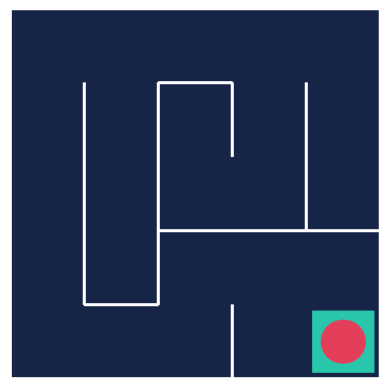

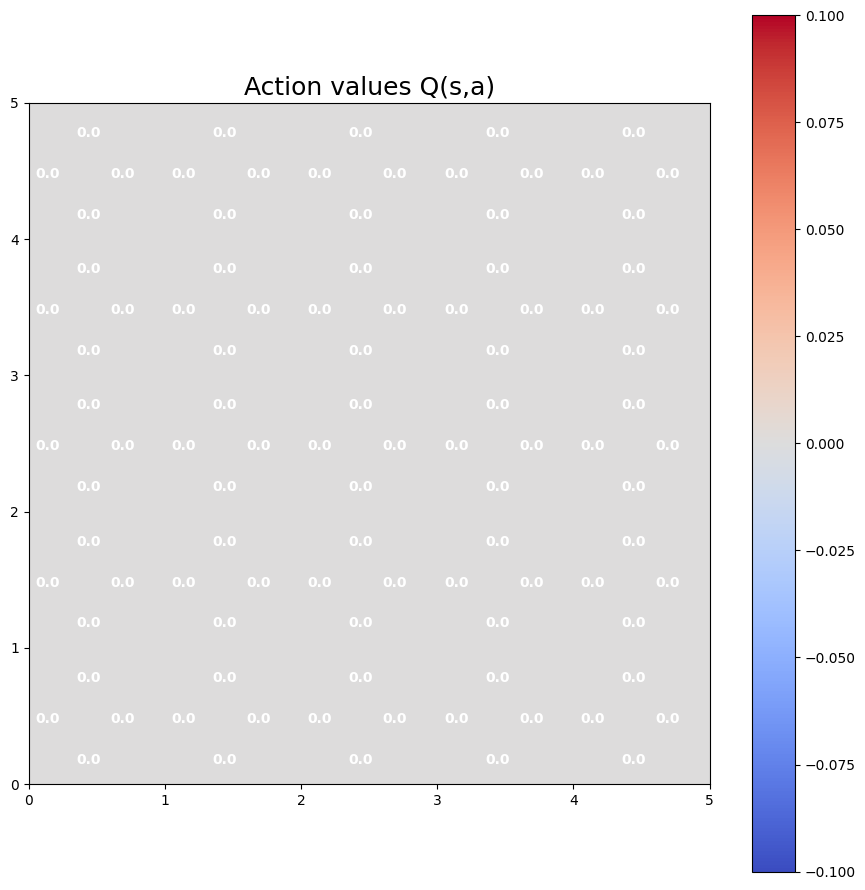

Action taken in state (0,0): 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

print(f'Observation Space: {env.observation_space}')
print(f'Action Space: {env.action_space}')

action_values = np.zeros(shape=(5,5,4))

plot_action_values(action_values)

def policy(state, epsilon=0.):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

action = policy((0,0) ,0.2)
print(f'Action taken in state (0,0): {action}')

In [2]:
env = Maze()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
action_values = np.zeros(shape=(5,5,4))

In [4]:
def policy(state, epsilon=0.):
  if np.random.random() < epsilon:
    return np.random.randint(4)

  else:
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

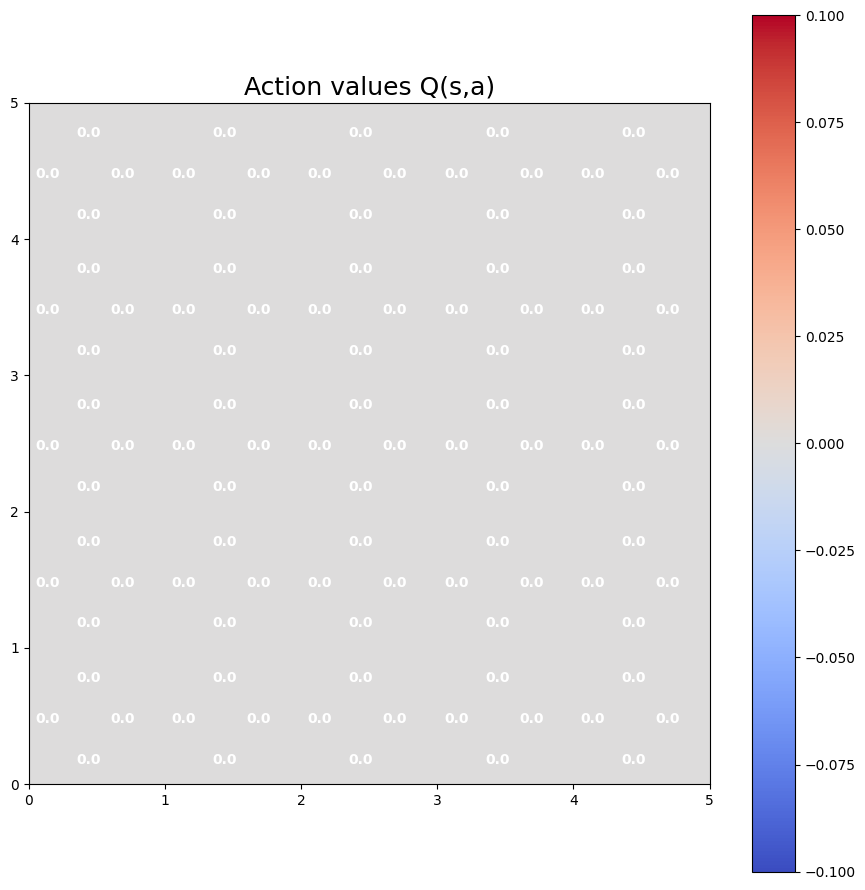

In [5]:
plot_action_values(action_values)

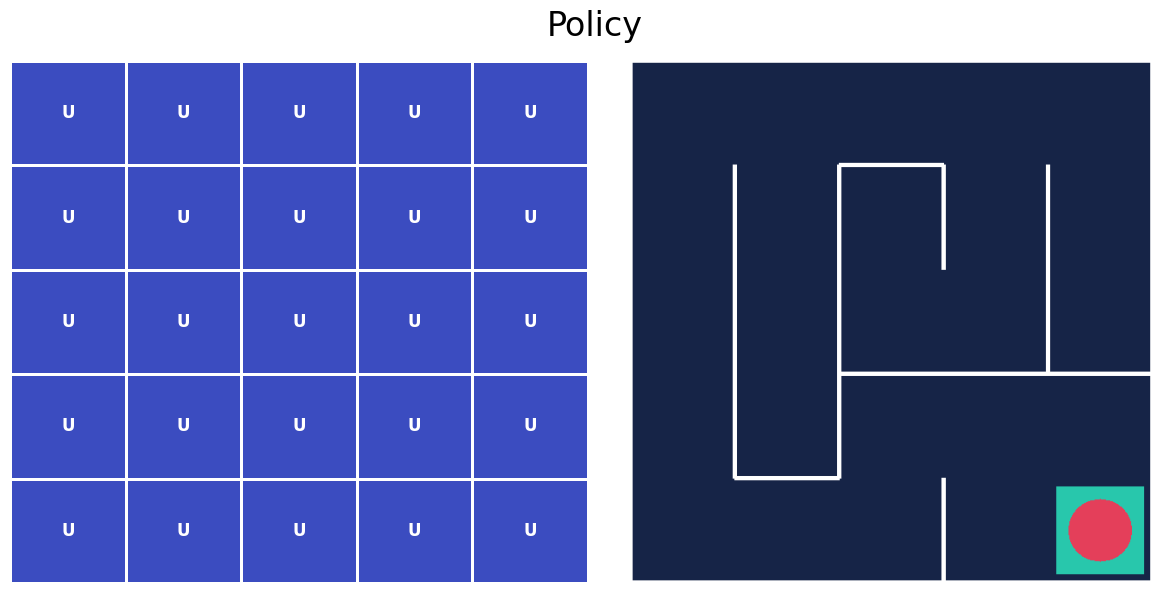

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [8]:
def sarsa(action_values, policy, episodes, alpha = 0.1, gamma = 0.99 , epsilon = 0.2):

  for episode in range(1, episodes + 1):
    state = env.reset()
    action = policy(state, epsilon)
    done = False
    while not done:
      next_state, reward, done, _ =env.step(action)
      next_action = policy(next_state, epsilon)

      qsa = action_values[state][action]
      next_qsa = action_values[next_state][next_action]
      action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)

      state = next_state
      action = next_action

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
sarsa(action_values, policy, 1000)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


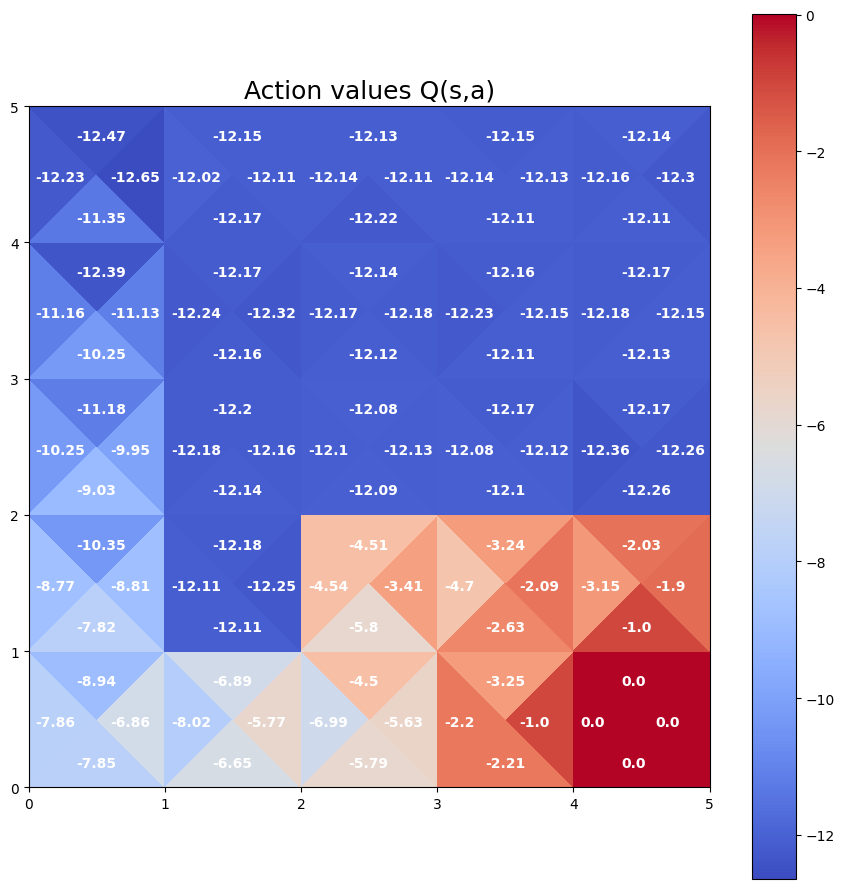

In [10]:
plot_action_values(action_values)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


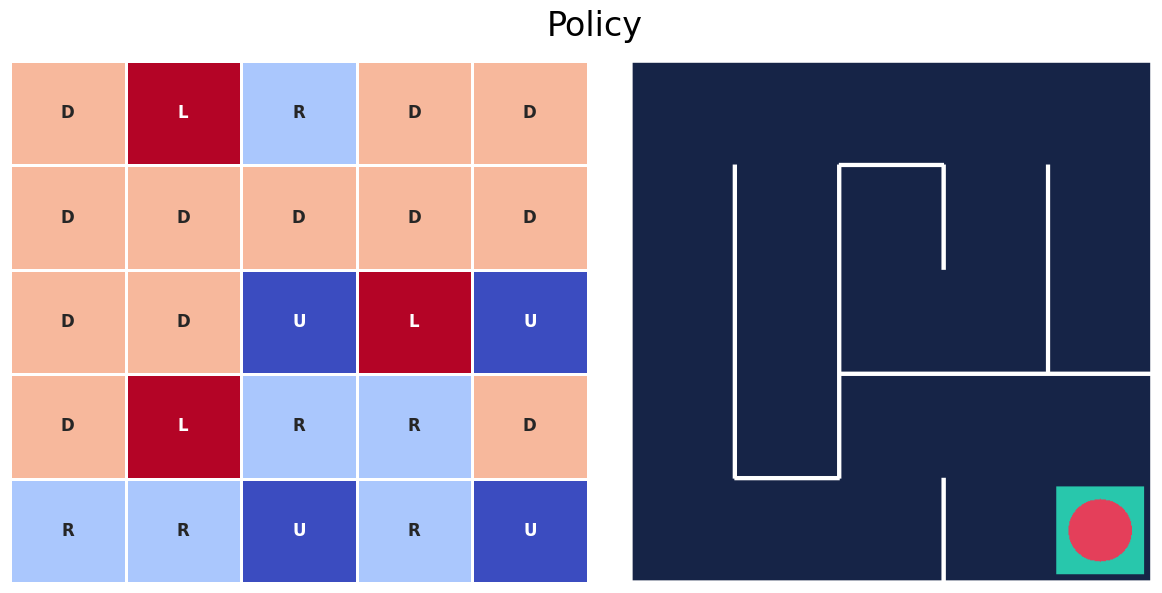

In [11]:
plot_policy(action_values, env.render(mode='rgb_array'))

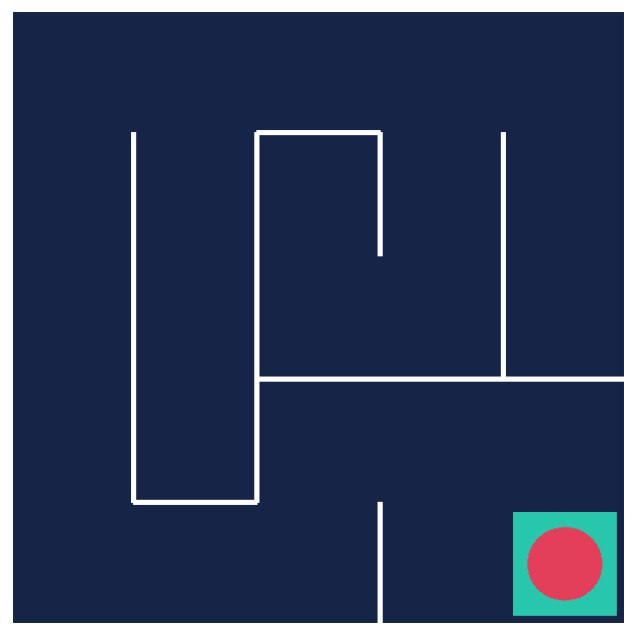

In [12]:
test_agent(env , policy, episodes =5)